In [1]:
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as py
import plotly.io as pio
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
nltk.download('punkt')
import seaborn as sns


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
file=pd.read_csv('/content/gdrive/MyDrive/posts_set.csv')

In [4]:
file['alltext'] = file['title'] + file['selftext']

In [5]:
file.isnull().values.any()

True

In [6]:
data = file.dropna()
data.isnull().values.any()

False

In [7]:
data = data[data['alltext'].map(len) < 1000]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 983
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    960 non-null    int64  
 1   name          960 non-null    object 
 2   title         960 non-null    object 
 3   selftext      960 non-null    object 
 4   ups           960 non-null    float64
 5   downs         960 non-null    float64
 6   upvote_ratio  960 non-null    float64
 7   comments      960 non-null    float64
 8   created_utc   960 non-null    object 
 9   id            960 non-null    object 
 10  url           960 non-null    object 
 11  kind          960 non-null    object 
 12  alltext       960 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 105.0+ KB


In [8]:
#posts word counts distribution
data["word_count"] = data['alltext'].str.split().str.len()
length = data['word_count']
data.head()

,Unnamed: 0,name,title,selftext,ups,downs,upvote_ratio,comments,created_utc,id,url,kind,alltext,word_count
0,0,t3_tw3ucp,The kids in my neighborhood love to play aroun...,If I knew the beautiful insects were attracted...,3.0,0.0,1.00,0.0,2022-04-04T14:48:12Z,tw3ucp,https://www.reddit.com/r/TwoSentenceHorror/com...,t3,The kids in my neighborhood love to play aroun...,36
1,1,t3_tw3dys,"When I was a child, my parents used to drop me...","And each time, the marks her teeth left on my ...",1.0,0.0,1.00,0.0,2022-04-04T14:28:39Z,tw3dys,https://www.reddit.com/r/TwoSentenceHorror/com...,t3,"When I was a child, my parents used to drop me...",37
2,2,t3_tw3dgv,"Trapped in a hole, they were happy when a whit...",They screamed when they saw the source of the ...,12.0,0.0,0.93,1.0,2022-04-04T14:28:07Z,tw3dgv,https://www.reddit.com/r/TwoSentenceHorror/com...,t3,"Trapped in a hole, they were happy when a whit...",40
3,3,t3_tw3d2w,The doctor looked at me and said “you won’t fe...,"I looked back at them and said, “you’re right,...",7.0,0.0,1.00,0.0,2022-04-04T14:27:43Z,tw3d2w,https://www.reddit.com/r/TwoSentenceHorror/com...,t3,The doctor looked at me and said “you won’t fe...,27
4,4,t3_tw38u6,Deathbed Companion,"My Deathbed Companion, a stranger who promised...",1.0,0.0,1.00,0.0,2022-04-04T14:22:57Z,tw38u6,https://www.reddit.com/r/TwoSentenceHorror/com...,t3,"Deathbed CompanionMy Deathbed Companion, a str...",36


Text(0.5, 1.0, 'Distribution of posts lengths')

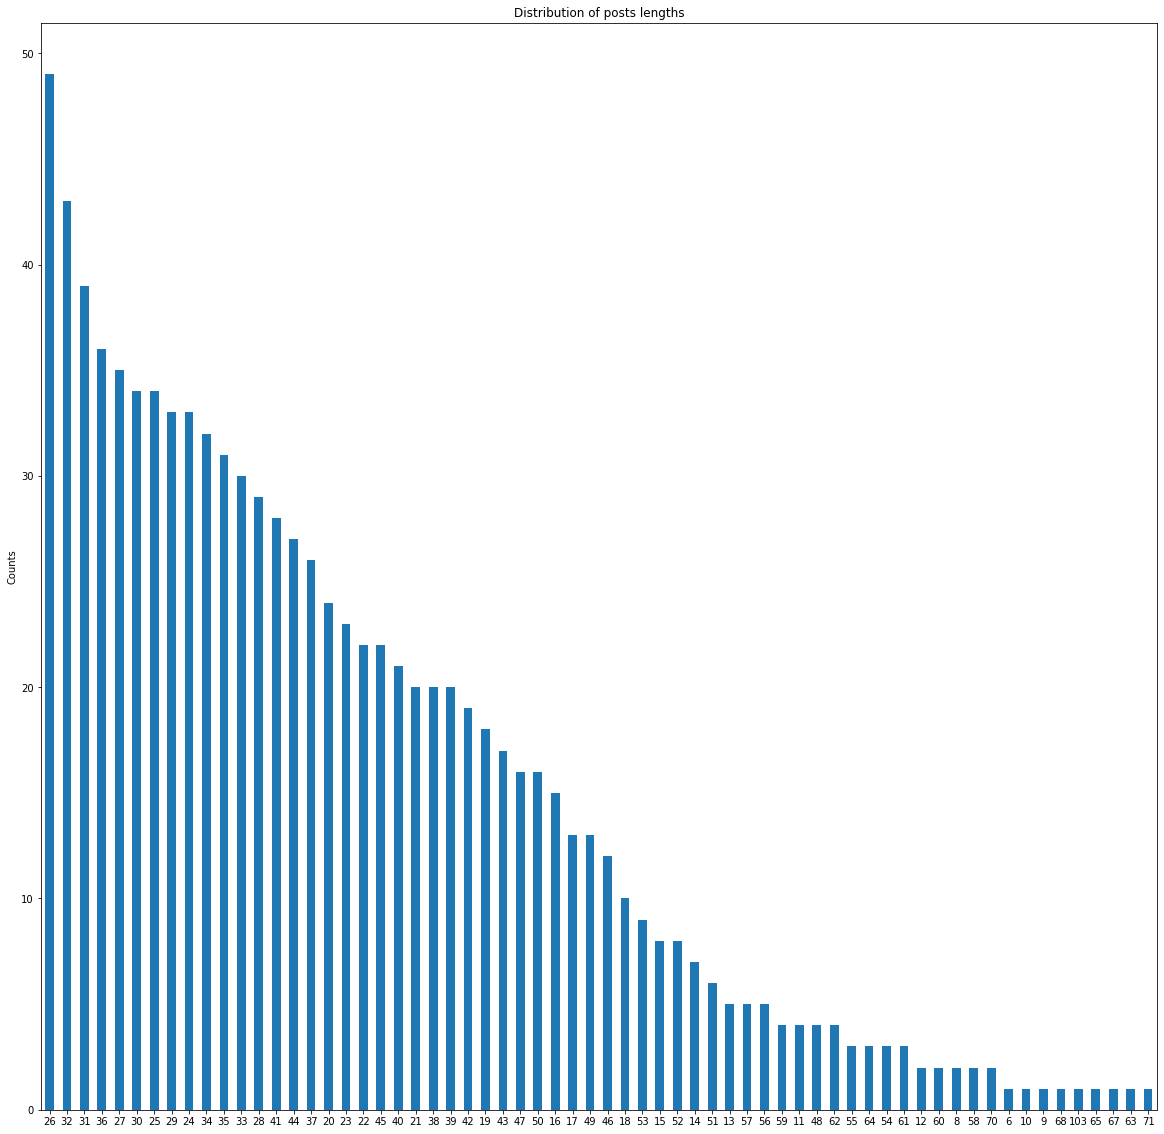

In [9]:
#data['length'].value_counts().plot(kind='barh', figsize = (20,20))
ax = data['word_count'].value_counts().plot(kind='bar',figsize = (20,20))
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# set the y-axis label
ax.set_ylabel('Counts')
# set the title
ax.set_title("Distribution of posts lengths")

In [10]:
data_tt = data[data['word_count'] == 9]
data_tt

,Unnamed: 0,name,title,selftext,ups,downs,upvote_ratio,comments,created_utc,id,url,kind,alltext,word_count
33,33,t3_tvuepe,the moon looks beautiful tonight.,whats that crawling across it?,25.0,0.0,0.95,2.0,2022-04-04T05:35:29Z,tvuepe,https://www.reddit.com/r/TwoSentenceHorror/com...,t3,the moon looks beautiful tonight.whats that cr...,9


Correlation between posts length and upvote ratio: 0.009401306013646655


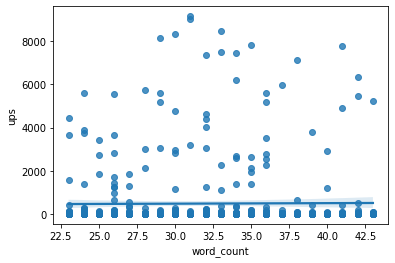

In [11]:
mask = (data['word_count'] >= 23) & (data['word_count'] <= 43)
df_stact = data.loc[mask]
sns.regplot(x= df_stact['word_count'], y= df_stact['ups'])
print('Correlation between posts length and upvote ratio:', df_stact['word_count'].corr(df_stact['ups']))


In [12]:
# word frequency plots generated tutorial:
#https://medium.com/@siglimumuni/natural-language-processing-in-python-exploring-word-frequencies-with-nltk-918f33c1e4c3

In [13]:
text = data['alltext'].values.tolist()

In [14]:
print(text[0],"\n",text[1],"\n",text[2])

The kids in my neighborhood love to play around in front of my house because of all the colorful butterflies.If I knew the beautiful insects were attracted to corpses, I would have buried the body deeper. 
 When I was a child, my parents used to drop me off at grandma's every weekend.And each time, the marks her teeth left on my neck disappeared right before my parents returned to pick me back up. 
 Trapped in a hole, they were happy when a white rope was thrown into the hole at night.They screamed when they saw the source of the rope: a giant spider's jaws, but the rope was too sticky to let go.


In [15]:
wordslist= [word_tokenize(x) for x in text]

words = []
for i in wordslist:
  for j in i:
    words.append(j)
#check the number of words
print(f"The total number of words in the text is {len(words)}")

The total number of words in the text is 36163


In [16]:
#find the frequency of words
fdist = FreqDist(words)

#print the 10 most common words
print(fdist.most_common(10))

[('the', 1896), (',', 1418), ('I', 1309), ('to', 922), ('.', 876), ('my', 787), ('and', 630), ('of', 586), ('a', 575), ('was', 500)]


In [17]:
#create an empty list to store words
words_no_punc = []

#iterate through the words list to remove punctuations
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())

#print number of words without punctuation
print(f"The total number of words without punctuation is {len(words_no_punc)}")

The total number of words without punctuation is 31268


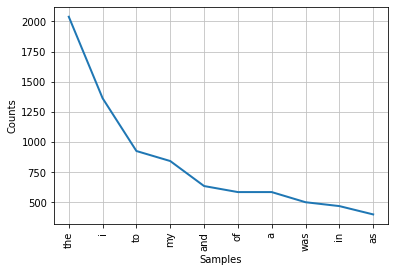

<Figure size 432x288 with 0 Axes>

In [18]:
#find the top 10 words
#find the frequency of words
fdist = FreqDist(words_no_punc)

#Plot the 10 most common words
fdist.plot(10)
plt.show()
plt.savefig('freqDist_10.png', bbox_inches = "tight")

In [19]:
nltk.download("stopwords")
from nltk.corpus import stopwords

#list of stopwords
stopwords_list = stopwords.words("english")
#print(stopwords_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")

The total number of words without punctuation and stopwords is 15081


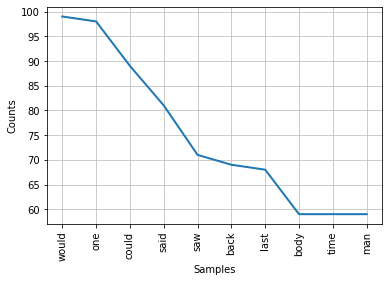

<Figure size 432x288 with 0 Axes>

In [21]:
#find the frequency of words
fdist_cw = FreqDist(clean_words)

fdist_cw.plot(10)
plt.show()
plt.savefig('freqDist_cw_10.png', bbox_inches = "tight")

In [22]:
print(fdist_cw.most_common(10))

[('would', 99), ('one', 98), ('could', 89), ('said', 81), ('saw', 71), ('back', 69), ('last', 68), ('body', 59), ('time', 59), ('man', 59)]


In [23]:
#Update the stopwords list
stopwords_list.extend(["would","one","could"])

#create an empty list to store clean words
clean_words_2 = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words_2.append(word)

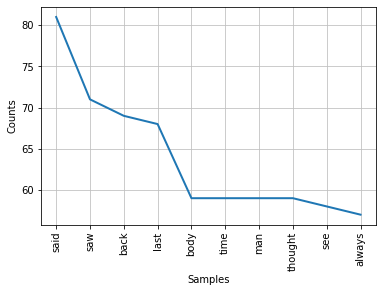

<Figure size 432x288 with 0 Axes>

In [24]:
#find the frequency of words
fdist_cw_2 = FreqDist(clean_words_2)
#Plot the 10 most common words
fdist_cw_2.plot(10)
plt.show()
plt.savefig('freqDist_cw__2_10.png', bbox_inches = "tight")

In [25]:
print(fdist_cw_2.most_common(10))

[('said', 81), ('saw', 71), ('back', 69), ('last', 68), ('body', 59), ('time', 59), ('man', 59), ('thought', 59), ('see', 58), ('always', 57)]


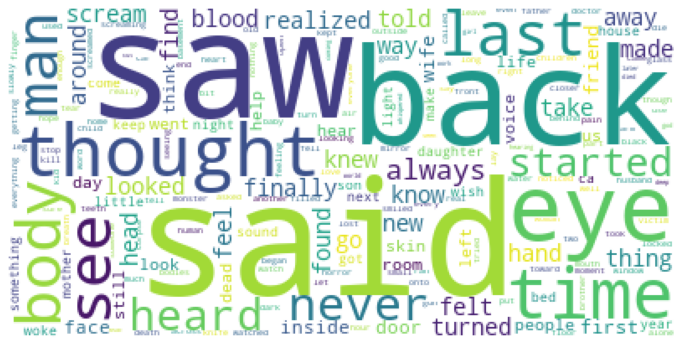

<Figure size 432x288 with 0 Axes>

In [26]:
#Convert word list to a single string
clean_words_string = " ".join(clean_words_2)

#generating the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png')

In [27]:
# sentiment analysis with textblob
# https://github.com/jeremydiba/sentiment-analysis-medium/blob/main/sentiment%20playground.ipynb

In [28]:
from textblob import TextBlob
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
data['count'] = 1

In [30]:
data_textblob = data[["name", "ups",'comments','word_count', "title","selftext", 'alltext','count']]
data_textblob.head()

,name,ups,comments,word_count,title,selftext,alltext,count
0,t3_tw3ucp,3.0,0.0,36,The kids in my neighborhood love to play aroun...,If I knew the beautiful insects were attracted...,The kids in my neighborhood love to play aroun...,1
1,t3_tw3dys,1.0,0.0,37,"When I was a child, my parents used to drop me...","And each time, the marks her teeth left on my ...","When I was a child, my parents used to drop me...",1
2,t3_tw3dgv,12.0,1.0,40,"Trapped in a hole, they were happy when a whit...",They screamed when they saw the source of the ...,"Trapped in a hole, they were happy when a whit...",1
3,t3_tw3d2w,7.0,0.0,27,The doctor looked at me and said “you won’t fe...,"I looked back at them and said, “you’re right,...",The doctor looked at me and said “you won’t fe...,1
4,t3_tw38u6,1.0,0.0,36,Deathbed Companion,"My Deathbed Companion, a stranger who promised...","Deathbed CompanionMy Deathbed Companion, a str...",1


In [31]:
data_textblob.isnull().values.any()

False

In [32]:
data_textblob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 983
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        960 non-null    object 
 1   ups         960 non-null    float64
 2   comments    960 non-null    float64
 3   word_count  960 non-null    int64  
 4   title       960 non-null    object 
 5   selftext    960 non-null    object 
 6   alltext     960 non-null    object 
 7   count       960 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 67.5+ KB


In [33]:
data_textblob["senti_score_alltext"] = data_textblob["alltext"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data_textblob["senti_alltext"] = np.select([data_textblob["senti_score_alltext"] < 0, data_textblob["senti_score_alltext"] == 0, data_textblob["senti_score_alltext"] > 0],
                           ['neg', 'neu', 'pos'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
data_textblob["senti_score_title"] = data_textblob["title"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data_textblob["senti_title"] = np.select([data_textblob["senti_score_title"] < 0, data_textblob["senti_score_title"] == 0, data_textblob["senti_score_title"] > 0],
                           ['neg', 'neu', 'pos'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
data_textblob["senti_score_selftext"] = data_textblob["selftext"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data_textblob["senti_selftext"] = np.select([data_textblob["senti_score_selftext"] < 0, data_textblob["senti_score_selftext"] == 0, data_textblob["senti_score_selftext"] > 0],
                           ['neg', 'neu', 'pos'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
grouped_textblob_1 = data_textblob.groupby(['senti_title','senti_selftext',"senti_alltext"]).sum()
grouped_textblob_1

ups  comments  word_count  \
senti_title senti_selftext senti_alltext                                  
neg         neg            neg            31289.0     865.0        3039   
            neu            neg            33651.0     716.0        2649   
                           neu              174.0      19.0         205   
                           pos                4.0       0.0          25   
            pos            neg            13026.0     351.0         919   
                           neu             1350.0      11.0          94   
                           pos            22537.0     513.0        1354   
neu         neg            neg            59136.0    1343.0        3558   
                           neu             1934.0      21.0          64   
                           pos               27.0       0.0          35   
            neu            neg             7388.0      62.0          55   
                           neu            61061.0    1761.0        4548   
                           pos               14.0       0.0          30   
            pos            neu               85.0       3.0         132   
                           pos            67362.0    1653.0        3371   
pos         neg            neg            21995.0     413.0        1984   
                           neu             4675.0      56.0         185   
                           pos            10926.0     307.0        1939   
            neu            neg               27.0       1.0          60   
                           neu             5702.0     129.0         130   
                           pos            52715.0    1155.0        3465   
            pos            pos            38687.0     946.0        4034   

                                          count  senti_score_alltext  \
senti_title senti_selftext senti_alltext                               
neg         neg            neg               78           -15.634594   
            neu            neg               86           -19.334671   
                           neu                8             0.000000   
                           pos                1             0.166667   
            pos            neg               23            -2.319440   
                           neu                3             0.000000   
                           pos               39             3.907367   
neu         neg            neg              108           -21.355802   
                           neu                2             0.000000   
                           pos                1             0.066667   
            neu            neg                1            -0.100000   
                           neu              166             0.000000   
                           pos                1             0.500000   
            pos            neu                4             0.000000   
                           pos              103            22.904027   
pos         neg            neg               51            -4.207245   
                           neu                4             0.000000   
                           pos               50             5.873348   
            neu            neg                2            -0.251852   
                           neu                4             0.000000   
                           pos              112            31.376872   
            pos            pos              113            34.322195   

                                          senti_score_title  \
senti_title senti_selftext senti_alltext                      
neg         neg            neg                   -19.179392   
            neu            neg                   -24.731969   
                           neu                    -2.950000   
                           pos                    -0.250000   
            pos            neg                    -8.394411   
                           neu                    -1.050000   
            

In [37]:
grouped_textblob_1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22 entries, ('neg', 'neg', 'neg') to ('pos', 'pos', 'pos')
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ups                   22 non-null     float64
 1   comments              22 non-null     float64
 2   word_count            22 non-null     int64  
 3   count                 22 non-null     int64  
 4   senti_score_alltext   22 non-null     float64
 5   senti_score_title     22 non-null     float64
 6   senti_score_selftext  22 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.5+ KB


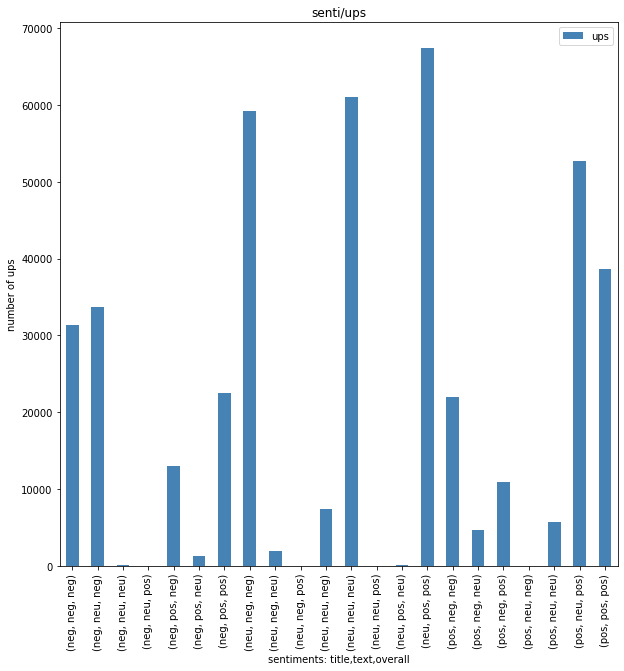

In [38]:
df_plot1 = grouped_textblob_1.iloc[:,:1]
df_plot1.plot(kind='bar', title='senti/ups', ylabel='number of ups',
         xlabel='sentiments: title,text,overall', figsize=(10, 10), color = 'steelblue')

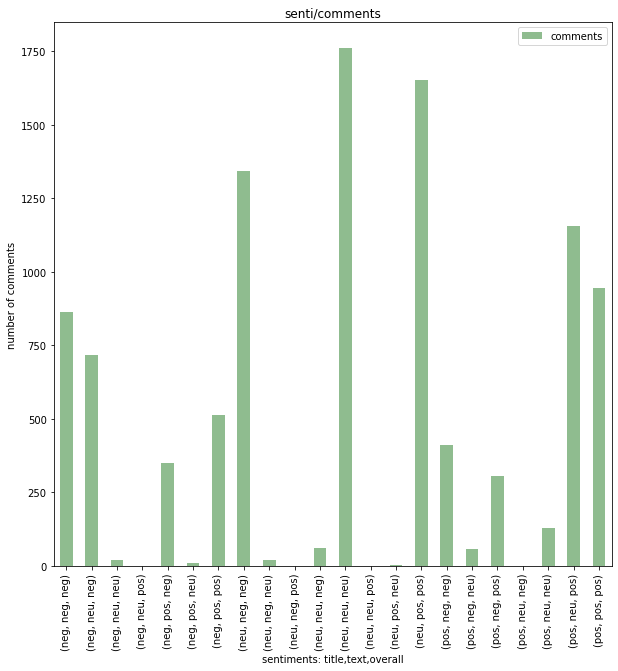

In [39]:
df_plot2 = grouped_textblob_1.iloc[:,1:2]
df_plot2.plot(kind='bar', title='senti/comments', ylabel='number of comments',
         xlabel='sentiments: title,text,overall', figsize=(10, 10), color = 'darkseagreen')

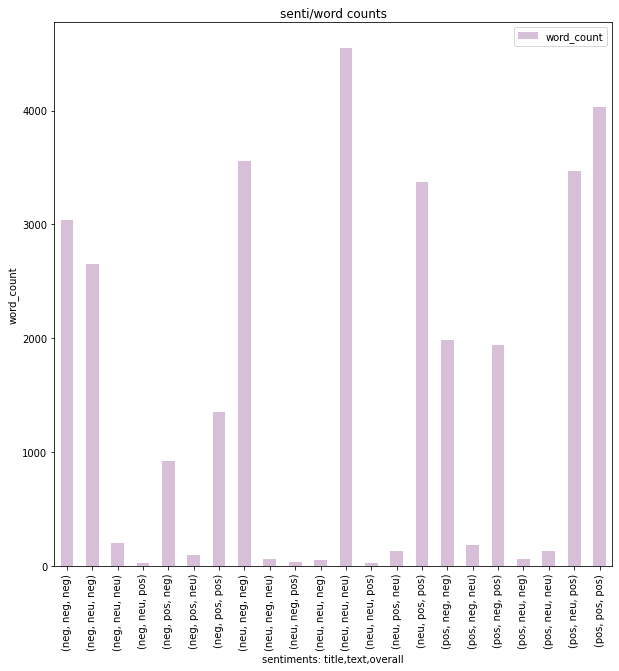

In [40]:
df_plot3 = grouped_textblob_1.iloc[:,2:3]
df_plot3.plot(kind='bar', title='senti/word counts', ylabel='word_count',
         xlabel='sentiments: title,text,overall', figsize=(10, 10), color = 'thistle')

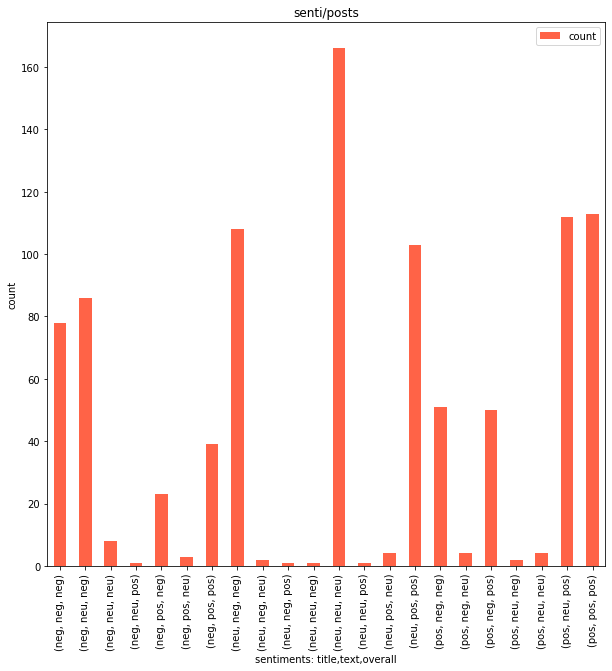

In [41]:
df_plot4 = grouped_textblob_1.iloc[:,3:4]
df_plot4.plot(kind='bar', title='senti/posts', ylabel='count',
         xlabel='sentiments: title,text,overall', figsize=(10, 10),color = 'tomato')

In [42]:
grouped_textblob_2 = data_textblob.groupby("senti_alltext").sum()
grouped_textblob_2

,ups,comments,word_count,count,senti_score_alltext,senti_score_title,senti_score_selftext
senti_alltext,,,,,,,
neg,166512.0,3751.0,12264,349,-63.203604,-40.813325,-52.023073
neu,74981.0,2000.0,5358,191,0.000000,-1.912500,0.672222
pos,192272.0,4574.0,14253,420,99.117142,85.050896,62.984839


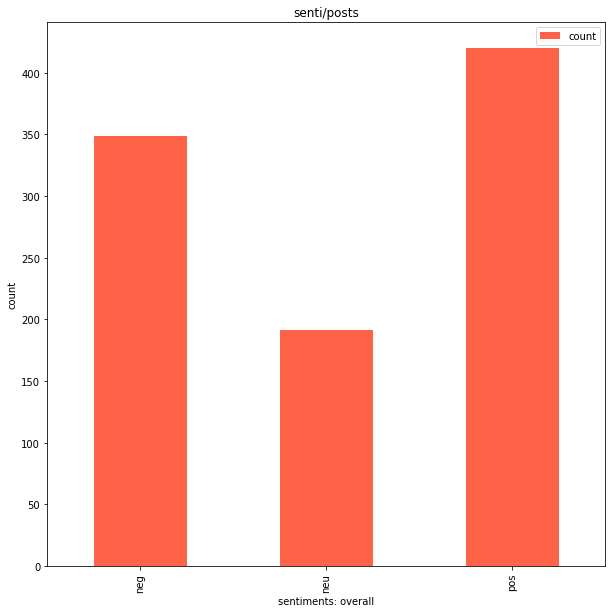

In [43]:
df_plot5 = grouped_textblob_2.iloc[:,3:4]
df_plot5.plot(kind='bar', title='senti/posts', ylabel='count',
         xlabel='sentiments: overall', figsize=(10, 10),color = 'tomato')

In [44]:
#Topic modelling with LDA
#https://medium.com/towards-data-science/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [86]:
import re
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [46]:
data_toke = data[['alltext']]

In [47]:
#remove puctuation
data_toke['text_processed'] = \
data_toke['alltext'].map(lambda x :re.sub('[,\.!?“’''""‘;:]','',x))

#lower case
data_toke['text_processed'] = \
data_toke['text_processed'].map(lambda x :x.lower())
data_toke['text_processed'].head()
tempdf = data_toke[['text_processed']]
tempdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,text_processed
0,the kids in my neighborhood love to play aroun...
1,when i was a child my parents used to drop me ...
2,trapped in a hole they were happy when a white...
3,the doctor looked at me and said you wont feel...
4,deathbed companionmy deathbed companion a stra...


In [48]:
stop_words = stopwords_list

In [49]:
def sent_to_words(sentences):
  for sent in sentences:
    yield(gensim.utils.simple_preprocess(str(sentences), deacc= True))

def remove_stopwords(texts):
  return[[word for word in simple_preprocess(str(doc))
          if word not in stop_words] for doc in texts]

In [50]:
data_3 = data_toke.text_processed.values.tolist()

In [51]:
data_words = list(sent_to_words(data_3))
data_words = remove_stopwords(data_words)
print(data_words[:1])

[['kids', 'neighborhood', 'love', 'play', 'around', 'front', 'house', 'colorful', 'butterfliesif', 'knew', 'beautiful', 'insects', 'attracted', 'corpses', 'buried', 'body', 'deeper', 'child', 'parents', 'used', 'drop', 'grandma', 'every', 'weekendand', 'time', 'marks', 'teeth', 'left', 'neck', 'disappeared', 'right', 'parents', 'returned', 'pick', 'back', 'trapped', 'hole', 'happy', 'white', 'rope', 'thrown', 'hole', 'nightthey', 'screamed', 'saw', 'source', 'rope', 'giant', 'spider', 'jaws', 'rope', 'sticky', 'let', 'go', 'doctor', 'looked', 'said', 'wont', 'feel', 'thing', 'looked', 'back', 'said', 'youre', 'right', 'ill', 'quick', 'showing', 'teeth', 'deathbed', 'companionmy', 'deathbed', 'companion', 'stranger', 'promised', 'pass', 'alone', 'lay', 'beside', 'take', 'last', 'breath', 'vision', 'fades', 'eyes', 'roll', 'back', 'moans', 'satisfaction', 'hearing', 'young', 'adolescent', 'daughter', 'crying', 'loudly', 'every', 'night', 'recently', 'knew', 'needed', 'encourage', 'slay',

In [52]:
import gensim.corpora as corpora
from pprint import pprint 

In [53]:
myword = corpora.Dictionary(data_words)
texts = data_words
corpus = [myword.doc2bow(text)for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 7), (2, 2), (3, 1), (4, 1), (5, 11), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 4), (19, 1), (20, 3), (21, 4), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1)]


In [89]:
lda_model = LdaModel(corpus=corpus,
                   id2word=myword,
                   num_topics=6, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
#https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.005*"said" + 0.005*"back" + 0.005*"saw" + 0.004*"like" + 0.004*"last" + '
  '0.004*"thought" + 0.004*"time" + 0.004*"body" + 0.004*"told" + 0.004*"see"'),
 (1,
  '0.005*"said" + 0.005*"saw" + 0.004*"man" + 0.004*"like" + 0.004*"body" + '
  '0.004*"back" + 0.004*"thought" + 0.004*"last" + 0.004*"away" + '
  '0.004*"time"'),
 (2,
  '0.005*"saw" + 0.004*"see" + 0.004*"thought" + 0.004*"back" + 0.004*"last" + '
  '0.004*"said" + 0.004*"heard" + 0.004*"like" + 0.004*"looked" + 0.004*"get"'),
 (3,
  '0.006*"said" + 0.005*"last" + 0.005*"back" + 0.004*"time" + 0.004*"body" + '
  '0.004*"saw" + 0.004*"thought" + 0.004*"started" + 0.004*"like" + '
  '0.004*"always"'),
 (4,
  '0.005*"back" + 0.005*"said" + 0.005*"see" + 0.005*"always" + 0.004*"last" + '
  '0.004*"saw" + 0.004*"started" + 0.004*"body" + 0.004*"heard" + '
  '0.004*"never"'),
 (5,
  '0.005*"last" + 0.004*"said" + 0.004*"time" + 0.004*"saw" + 0.004*"see" + '
  '0.004*"back" + 0.004*"man" + 0.004*"blood" + 0.004*"finally" +

In [90]:
#evaluation of lda model
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=myword, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.22010502186441724


In [91]:
lda_model_2 = LdaModel(corpus=corpus,
                   id2word=myword,
                   num_topics=4, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model_2.print_topics())
doc_lda = lda_model_2[corpus]
coherence_model_lda_2 = CoherenceModel(model=lda_model_2, texts=data_words, dictionary=myword, coherence='c_v')
coherence_lda_2 = coherence_model_lda_2.get_coherence()

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.005*"said" + 0.005*"back" + 0.004*"saw" + 0.004*"last" + 0.004*"see" + '
  '0.004*"like" + 0.004*"time" + 0.004*"always" + 0.004*"thought" + '
  '0.004*"body"'),
 (1,
  '0.005*"said" + 0.005*"saw" + 0.004*"man" + 0.004*"back" + 0.004*"body" + '
  '0.004*"last" + 0.004*"always" + 0.004*"like" + 0.004*"away" + '
  '0.004*"thought"'),
 (2,
  '0.005*"saw" + 0.004*"see" + 0.004*"back" + 0.004*"last" + 0.004*"heard" + '
  '0.004*"said" + 0.004*"thought" + 0.004*"looked" + 0.003*"man" + '
  '0.003*"felt"'),
 (3,
  '0.006*"said" + 0.005*"last" + 0.005*"back" + 0.004*"time" + 0.004*"body" + '
  '0.004*"saw" + 0.004*"started" + 0.004*"always" + 0.004*"see" + '
  '0.004*"thought"')]

Coherence Score 2:  0.22010502186441724


In [92]:
print('\nCoherence Score 2: ', coherence_lda_2)


Coherence Score 2:  0.2222583485327907


In [93]:
lda_model_3 = LdaModel(corpus=corpus,
                   id2word=myword,
                   num_topics=2, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model_3.print_topics())
doc_lda = lda_model_3[corpus]
coherence_model_lda_3 = CoherenceModel(model=lda_model_3, texts=data_words, dictionary=myword, coherence='c_v')
coherence_lda_3 = coherence_model_lda_3.get_coherence()
print('\nCoherence Score 3: ', coherence_lda_3)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.005*"said" + 0.005*"back" + 0.004*"last" + 0.004*"saw" + 0.004*"see" + '
  '0.004*"time" + 0.004*"thought" + 0.004*"like" + 0.004*"always" + '
  '0.004*"body"'),
 (1,
  '0.005*"said" + 0.005*"saw" + 0.004*"man" + 0.004*"last" + 0.004*"back" + '
  '0.004*"body" + 0.004*"started" + 0.004*"always" + 0.004*"thought" + '
  '0.004*"time"')]

Coherence Score 3:  0.22512266776224238


In [60]:
#visualizing
!pip install pyLDAvis

In [61]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [95]:
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/ladvis_prepared_')

In [98]:
if 1 == 1:
  LDAvis_prepared = gensimvis.prepare(lda_model, corpus, myword)
  with open(LDAvis_data_filepath,'wb')as f:
    pickle.dump(LDAvis_prepared, f)
with open(LDAvis_data_filepath,'rb') as f:
  LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/ladvis_prepared_'+'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.004257 -0.000593       1        1  16.809652
1     -0.000144  0.003737       2        1  16.778839
3     -0.000042 -0.002212       3        1  16.730323
0      0.001613  0.000649       4        1  16.576158
5      0.002128 -0.001414       5        1  16.560800
2      0.000703 -0.000167       6        1  16.544229, topic_info=         Term          Freq         Total Category  logprob  loglift
2813     like  54689.000000  54689.000000  Default  30.0000  30.0000
2788     life  30712.000000  30712.000000  Default  29.0000  29.0000
2272    heart  15354.000000  15354.000000  Default  28.0000  28.0000
4254      see  56632.000000  56632.000000  Default  27.0000  27.0000
302      away  38379.000000  38379.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
3245    never   7357.859020  51816.875498   Topic6  -5.8354  -0.1528
4711  started   7118.952568  49897.318931   Topic6  -5.8684  -0.1481
1826  finally   6867.857770  47982.020638   Topic6  -5.9043  -0.1448
1722     eyes   6569.396616  47016.189378   Topic6  -5.9487  -0.1689
131    always   6796.971795  54693.982752   Topic6  -5.9147  -0.2861

[538 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
5         1  0.130060   able
5         2  0.120682   able
5         3  0.201010   able
5         4  0.166150   able
5         5  0.216261   able
...     ...       ...    ...
5630      2  0.168647  wreck
5630      3  0.166565  wreck
5630      4  0.149908  wreck
5630      5  0.157196  wreck
5630      6  0.121801  wreck

[2112 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 1, 6, 3])

In [64]:
#Text generation with GPT2
#https://github.com/klaudia-nazarko/nlg-text-generation/blob/main/gpt_2.ipynb

In [65]:
!pip install transformers

In [66]:
from transformers import (
    GPT2Tokenizer,
    DataCollatorForLanguageModeling,
    TextDataset,
    GPT2LMHeadModel,
    TrainingArguments,
    Trainer,
    pipeline)

In [67]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

In [68]:
print('vocabulary size: %d, max squence length: %d' % (tokenizer.vocab_size, tokenizer.model_max_length))
print('tokenize sequence "Once upon a time in a little village":', tokenizer('Once upon a time in a little village'))

vocabulary size: 50257, max squence length: 1024
tokenize sequence "Once upon a time in a little village": {'input_ids': [7454, 2402, 257, 640, 287, 257, 1310, 7404], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


In [69]:
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

In [70]:
data_gpt2 = data[['alltext']]
data_gpt2.to_csv("textdata.txt", header=False, index=False)
data_path='/content/textdata.txt'

In [71]:
text_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path=data_path,
    block_size=128)
print(tokenizer.decode(text_dataset[5]))

 my mother asked me.I pointed at the cooking pot, she went silent."
"“Let’s go for a swim”, the girl said to her friends as they ran into the lake.Little did they know that there was something else lurking in the waters."
"[APR22] ""Uno"" I yelled at the top of my lungs while laughing hysterically.I was the last survivor after the beast ripped apart the entire encampment."
"The surgeons looked on in consternation at the man sitting up in bed happily eating a bowl of jelly and ice cream.""This is completely unprecedented,


/usr/local/lib/python3.7/dist-packages/transformers/data/datasets/language_modeling.py:58: FutureWarning:

This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py



In [72]:
model = GPT2LMHeadModel.from_pretrained('gpt2')

In [73]:
training_args = TrainingArguments(
    output_dir = 'data/out', # the output directory for the model predictions and checkpoints
    overwrite_output_dir = True, # overwrite the content of the output directory
    per_device_train_batch_size = 32, # the batch size for training
    per_device_eval_batch_size = 32, # the batch size for evaluation
    learning_rate = 5e-5, # defaults to 5e-5
    num_train_epochs = 3, # total number of training epochs to perform
)

trainer = Trainer(
    model = model,
    args = training_args,
    data_collator=data_collator,
    train_dataset = text_dataset
    )

In [74]:
trainer.train()
trainer.save_model()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

***** Running training *****
  Num examples = 325
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 33


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)


Saving model checkpoint to data/out
Configuration saved in data/out/config.json
Model weights saved in data/out/pytorch_model.bin


In [75]:
generator = pipeline('text-generation', tokenizer='gpt2',model='data/out')

loading configuration file data/out/config.json
Model config GPT2Config {
  "_name_or_path": "data/out",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "use_cache": true,
  "vocab_size": 50257
}

loading configur

In [99]:
print(generator('Once upon a time', max_length=50)[0]['generated_text'])
#example input from the tutorial

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, it felt like someone took the top off of my head and my hands, but I was getting better and better, and finally the pressure finally came to take control.
"One of my teachers warned me not to do it


In [119]:
Generated_text = generator('The kids in my neighborhood love to', max_length=50)[0]['generated_text']
print('Generated text:\n', Generated_text)
print('Original text: \n', file.iloc[0,2],'\n',file.iloc[0,3])
#part of title of the first post

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated text:
 The kids in my neighborhood love to go to the movie," she snapped.
"When I looked in my backyard, my mother was laughing hysterically as I saw the sky glow green because my father is alive."
One friend told her "This
Original text: 
 The kids in my neighborhood love to play around in front of my house because of all the colorful butterflies. 
 If I knew the beautiful insects were attracted to corpses, I would have buried the body deeper.


In [121]:
text_k_sampling_1 = generator('Once upon a time',
                            max_length=50,
                            top_k=40,
                            do_sample=True)
print(text_k_sampling_1[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, this was only my family, my father and sister."The next moment, I realized that the room was surrounded by zombies. I had just given myself up to a zombie and left my sister behind.
"My friends and


In [79]:
print(fdist_cw_2.most_common(10))

[('said', 81), ('saw', 71), ('back', 69), ('last', 68), ('body', 59), ('time', 59), ('man', 59), ('thought', 59), ('see', 58), ('always', 57)]


In [80]:
ele = []

for x in fdist_cw_2.most_common(10):
    ele.append(x[0])

print(ele)

['said', 'saw', 'back', 'last', 'body', 'time', 'man', 'thought', 'see', 'always']


In [129]:
generated_texts = []
for i in range(len(ele)):
  text_k_sampling = generator(ele[i],
                            max_length=50,
                            top_k=40,
                            do_sample=True)
  generated_texts.append(text_k_sampling)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [130]:
generatedText = pd.DataFrame(generated_texts)
generatedText.columns = ["Generated_Text"]
generatedText["Generated_Text"] = generatedText["Generated_Text"] .map(lambda x: str(x)[:-1])
generatedText["Generated_Text"] = generatedText["Generated_Text"].map(lambda x: str(x)[20:])
generatedText

,Generated_Text
0,"said,\nIt doesn\'t matter what the man on the ..."
1,"saw"" as he walked in his room, the door closin..."
2,"back a glass off, she thought.\n""Donít be afra..."
3,"last, and the child was born,"" the mother said..."
4,"body I had.\n""When I woke up from the coma, I ..."
5,"time in the rain"", it was, I decided, my last ..."
6,"man. She smiled and whispered, ""So it\'s the n..."
7,"thought, but the voice said:\n""What\'s wrong w..."
8,see a ghost sitting on my lap and I can\'t hel...
9,"always be a joke"" he continued.As the child st..."


In [134]:
generatedText.to_csv('generatedText_10words.csv',index=False)

In [137]:
file.head()

,Unnamed: 0,name,title,selftext,ups,downs,upvote_ratio,comments,created_utc,id,url,kind,alltext
0,0,t3_tw3ucp,The kids in my neighborhood love to play aroun...,If I knew the beautiful insects were attracted...,3.0,0.0,1.00,0.0,2022-04-04T14:48:12Z,tw3ucp,https://www.reddit.com/r/TwoSentenceHorror/com...,t3,The kids in my neighborhood love to play aroun...
1,1,t3_tw3dys,"When I was a child, my parents used to drop me...","And each time, the marks her teeth left on my ...",1.0,0.0,1.00,0.0,2022-04-04T14:28:39Z,tw3dys,https://www.reddit.com/r/TwoSentenceHorror/com...,t3,"When I was a child, my parents used to drop me..."
2,2,t3_tw3dgv,"Trapped in a hole, they were happy when a whit...",They screamed when they saw the source of the ...,12.0,0.0,0.93,1.0,2022-04-04T14:28:07Z,tw3dgv,https://www.reddit.com/r/TwoSentenceHorror/com...,t3,"Trapped in a hole, they were happy when a whit..."
3,3,t3_tw3d2w,The doctor looked at me and said “you won’t fe...,"I looked back at them and said, “you’re right,...",7.0,0.0,1.00,0.0,2022-04-04T14:27:43Z,tw3d2w,https://www.reddit.com/r/TwoSentenceHorror/com...,t3,The doctor looked at me and said “you won’t fe...
4,4,t3_tw38u6,Deathbed Companion,"My Deathbed Companion, a stranger who promised...",1.0,0.0,1.00,0.0,2022-04-04T14:22:57Z,tw38u6,https://www.reddit.com/r/TwoSentenceHorror/com...,t3,"Deathbed CompanionMy Deathbed Companion, a str..."


In [147]:
df_10text = file.iloc[0:10,2:3]
df_10text

,title
0,The kids in my neighborhood love to play aroun...
1,"When I was a child, my parents used to drop me..."
2,"Trapped in a hole, they were happy when a whit..."
3,The doctor looked at me and said “you won’t fe...
4,Deathbed Companion
5,Hearing my young adolescent daughter crying lo...
6,[APR22] It wasn't the poorly hidden Ace of Clu...
7,My second husband keeps writing me love letter...
8,April fools we all shouted rushing into the ro...
9,"I saw every man, woman, and child holding guns..."


In [150]:
list_10text = df_10text['title']
list_10text

0    The kids in my neighborhood love to play aroun...
1    When I was a child, my parents used to drop me...
2    Trapped in a hole, they were happy when a whit...
3    The doctor looked at me and said “you won’t fe...
4                                   Deathbed Companion
5    Hearing my young adolescent daughter crying lo...
6    [APR22] It wasn't the poorly hidden Ace of Clu...
7    My second husband keeps writing me love letter...
8    April fools we all shouted rushing into the ro...
9    I saw every man, woman, and child holding guns...
Name: title, dtype: object

In [151]:
generated_texts_list = []
for i in range(10):
  text_k_sampling = generator(list_10text[i],
                            max_length=50,
                            top_k=40,
                            do_sample=True)
  generated_texts_list.append(text_k_sampling)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [152]:
generated_texts_list

[[{'generated_text': 'The kids in my neighborhood love to play around in front of my house because of all the colorful butterflies.\n"It feels like I\'m floating through time again"\n"My daughter was afraid to ask the right question.What made her turn off'}],
 [{'generated_text': 'When I was a child, my parents used to drop me off at grandma\'s every weekend. Now I have a job."\n"I saw my older brother, the only one who didn\'t know he had autism, but when I said that I'}],
 [{'generated_text': 'Trapped in a hole, they were happy when a white rope was thrown into the hole at night.\n"This one can be dangerous"The sound of the rope pulling the dead girl is as comforting as the sound of her breathing"\n"'}],
 [{'generated_text': 'The doctor looked at me and said “you won’t feel a thing.”""She continued,”she started to sob in pain.’"It was then she remembered a few days after she had the baby that'}],
 [{'generated_text': 'Deathbed Companion."\nThe body of this woman\'s mother sat at the 

In [154]:
generated_texts_df = pd.DataFrame(generated_texts_list)
generated_texts_df.columns = ["Generated_Text"]
generated_texts_df["Generated_Text"] = generated_texts_df["Generated_Text"] .map(lambda x: str(x)[:-1])
generated_texts_df["Generated_Text"] = generated_texts_df["Generated_Text"].map(lambda x: str(x)[20:])
generated_texts_df

,Generated_Text
0,The kids in my neighborhood love to play aroun...
1,"When I was a child, my parents used to drop me..."
2,"Trapped in a hole, they were happy when a whit..."
3,The doctor looked at me and said “you won’t fe...
4,"Deathbed Companion.""\nThe body of this woman\'..."
5,Hearing my young adolescent daughter crying lo...
6,[APR22] It wasn't the poorly hidden Ace of Clu...
7,My second husband keeps writing me love letter...
8,April fools we all shouted rushing into the ro...
9,"I saw every man, woman, and child holding guns..."


In [156]:
generated_texts_df['Original_Text'] = file['alltext']
generated_texts_df

,Generated_Text,Original_Text
0,The kids in my neighborhood love to play aroun...,The kids in my neighborhood love to play aroun...
1,"When I was a child, my parents used to drop me...","When I was a child, my parents used to drop me..."
2,"Trapped in a hole, they were happy when a whit...","Trapped in a hole, they were happy when a whit..."
3,The doctor looked at me and said “you won’t fe...,The doctor looked at me and said “you won’t fe...
4,"Deathbed Companion.""\nThe body of this woman\'...","Deathbed CompanionMy Deathbed Companion, a str..."
5,Hearing my young adolescent daughter crying lo...,Hearing my young adolescent daughter crying lo...
6,[APR22] It wasn't the poorly hidden Ace of Clu...,[APR22] It wasn't the poorly hidden Ace of Clu...
7,My second husband keeps writing me love letter...,My second husband keeps writing me love letter...
8,April fools we all shouted rushing into the ro...,April fools we all shouted rushing into the ro...
9,"I saw every man, woman, and child holding guns...","I saw every man, woman, and child holding guns..."


In [157]:
generated_texts_df.to_csv('generated_texts_10posts.csv',index=False)